In [1]:
import numpy as np
import os
from scipy.spatial.transform import Rotation as R
from scipy.signal import butter, filtfilt, correlate, find_peaks
from scipy.interpolate import interp1d
from scipy.linalg import logm
from scipy.io import savemat, loadmat
from scipy.stats import pointbiserialr
import scipy.io as spio
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import shutil
import gzip
import pingouin as pg
from pingouin import intraclass_corr
import re
from pathlib import Path
from collections import defaultdict
import json
import subprocess
from tqdm.notebook import tqdm

import matplotlib
import matplotlib.pyplot as plt

from mobgap.data import GenericMobilisedDataset
from mobgap.pipeline import MobilisedPipelineImpaired, MobilisedPipelineHealthy
from mobgap.utils.misc import get_env_var

import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) 
#warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Scanning X:\pervasive_group\Shared\MobilisedMS\Sensor data: 0files [00:00, ?files/s]

✅ Found 13246 matching files.

Processing subject 25000, session T2...

Processing subject 25000, session T3...

Processing subject 25000, session T4...

Processing subject 25000, session T5...

Processing subject 25001, session T1...

Processing subject 25001, session T2...

Processing subject 25001, session T3...

Processing subject 25001, session T4...

Processing subject 25001, session T5...

Processing subject 25002, session T1...

Processing subject 25002, session T2...

Processing subject 25002, session T3...

Processing subject 25002, session T4...

Processing subject 25003, session T1...

Processing subject 25004, session T1...

Processing subject 25005, session T1...


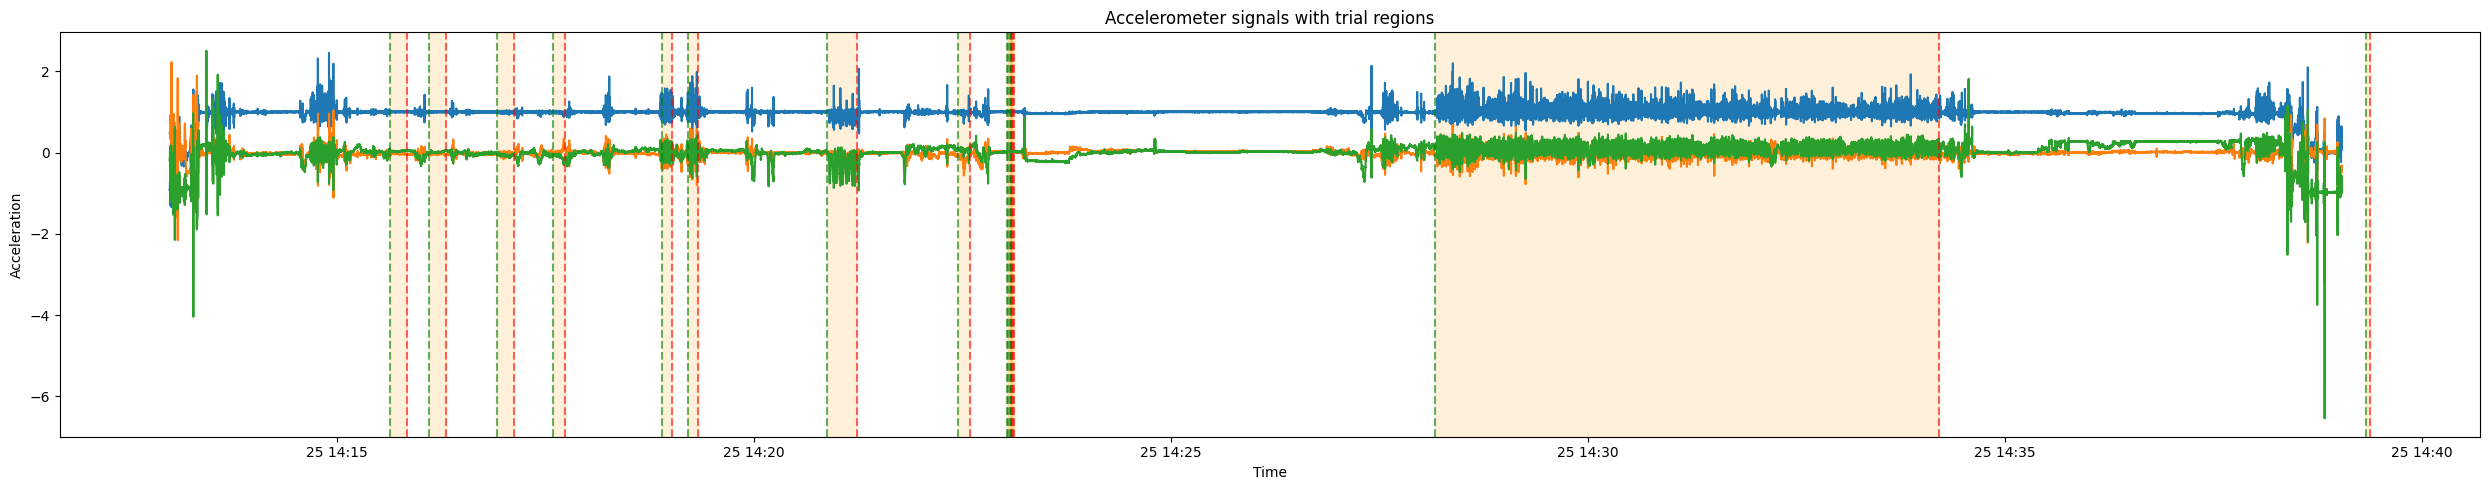


Processing subject 25005, session T2...

Processing subject 25006, session T1...

Processing subject 25006, session T3...

Processing subject 25006, session T4...

Processing subject 25007, session T1...

Processing subject 25007, session T2...

Processing subject 25007, session T3...

Processing subject 25007, session T4...

Processing subject 25007, session T5...

Processing subject 25008, session T1...

Processing subject 25008, session T2...

Processing subject 25008, session T3...

Processing subject 25008, session T5...

Processing subject 25009, session T1...

Processing subject 25009, session T2...

Processing subject 25010, session T1...

Processing subject 25010, session T2...

Processing subject 25010, session T3...

Processing subject 25010, session T4...

Processing subject 25011, session T1...


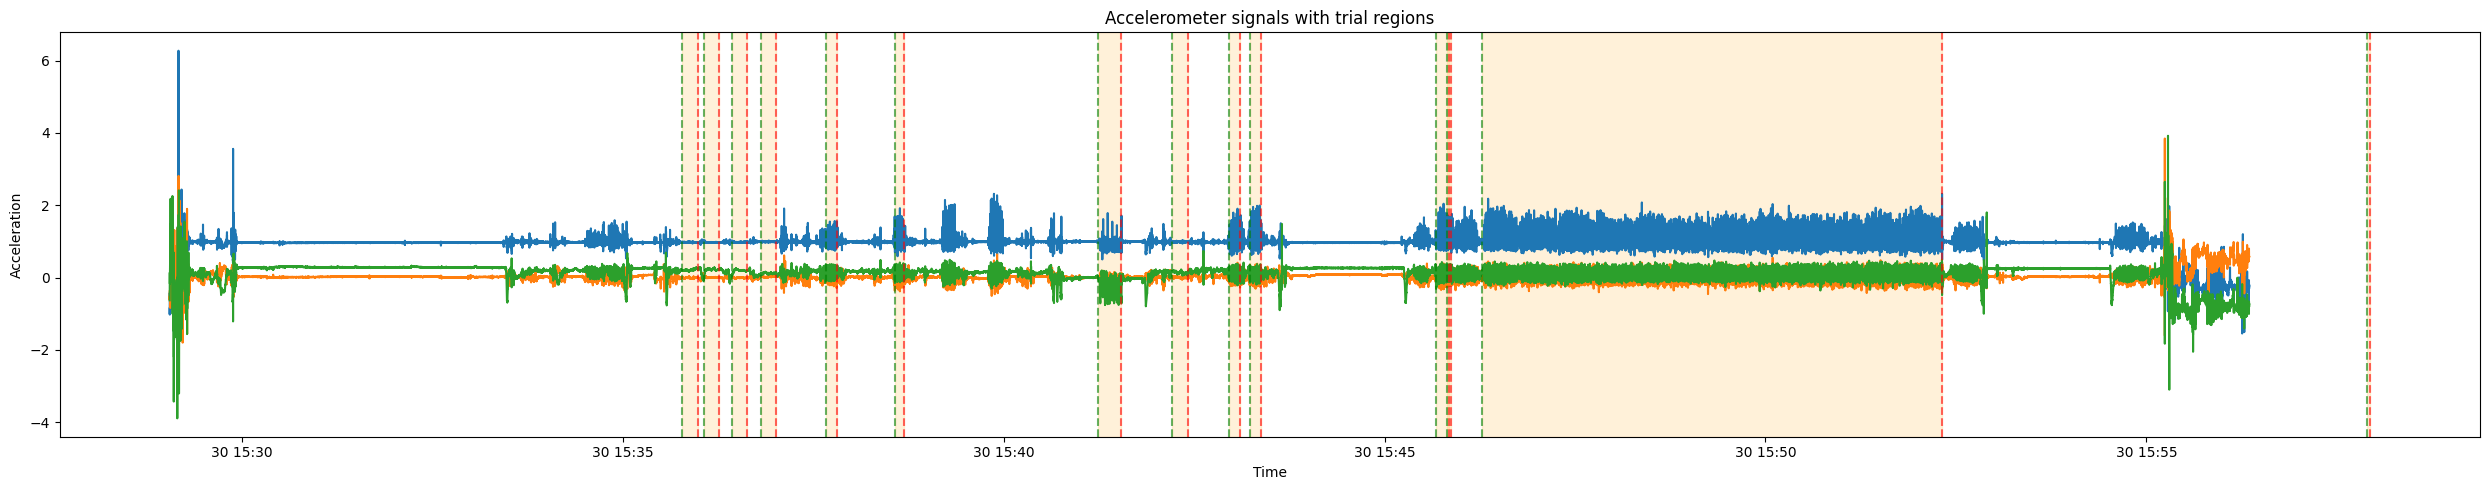


Processing subject 25011, session T2...

Processing subject 25011, session T3...

Processing subject 25011, session T5...

Processing subject 25012, session T1...

Processing subject 25012, session T2...

Processing subject 25012, session T3...

Processing subject 25012, session T4...

Processing subject 25012, session T5...

Processing subject 25013, session T1...

Processing subject 25013, session T2...

Processing subject 25013, session T3...

Processing subject 25013, session T4...

Processing subject 25014, session T1...

Processing subject 25014, session T2...

Processing subject 25014, session T3...

Processing subject 25014, session T4...

Processing subject 25014, session T5...

Processing subject 25015, session T1...

Processing subject 25015, session T2...

Processing subject 25015, session T3...

Processing subject 25015, session T4...

Processing subject 25015, session T5...

Processing subject 25016, session T1...

Processing subject 25016, session T2...

Processing subj

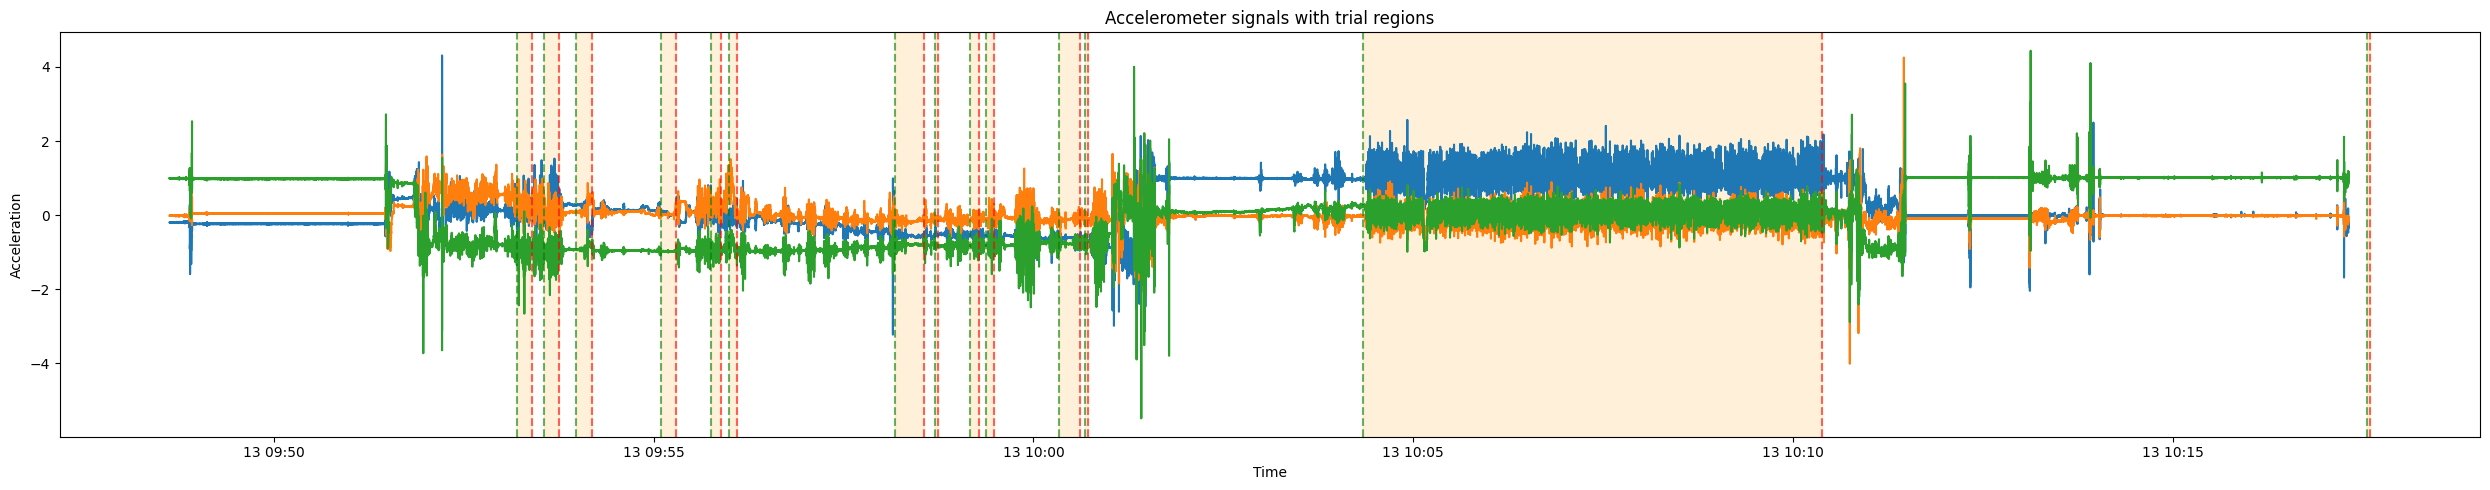


Processing subject 25020, session T4...

Processing subject 25020, session T5...

Processing subject 25021, session T1...

Processing subject 25022, session T2...

Processing subject 25022, session T3...

Processing subject 25022, session T4...

Processing subject 25022, session T5...

Processing subject 25023, session T1...

Processing subject 25023, session T2...

Processing subject 25023, session T3...

Processing subject 25023, session T4...

Processing subject 25023, session T5...

Processing subject 25024, session T1...

Processing subject 25024, session T2...

Processing subject 25024, session T3...

Processing subject 25024, session T5...

Processing subject 25025, session T1...

Processing subject 25025, session T3...

Processing subject 25025, session T4...

Processing subject 25026, session T1...

Processing subject 25026, session T2...

Processing subject 25026, session T3...

Processing subject 25027, session T1...

Processing subject 25027, session T3...

Processing subj

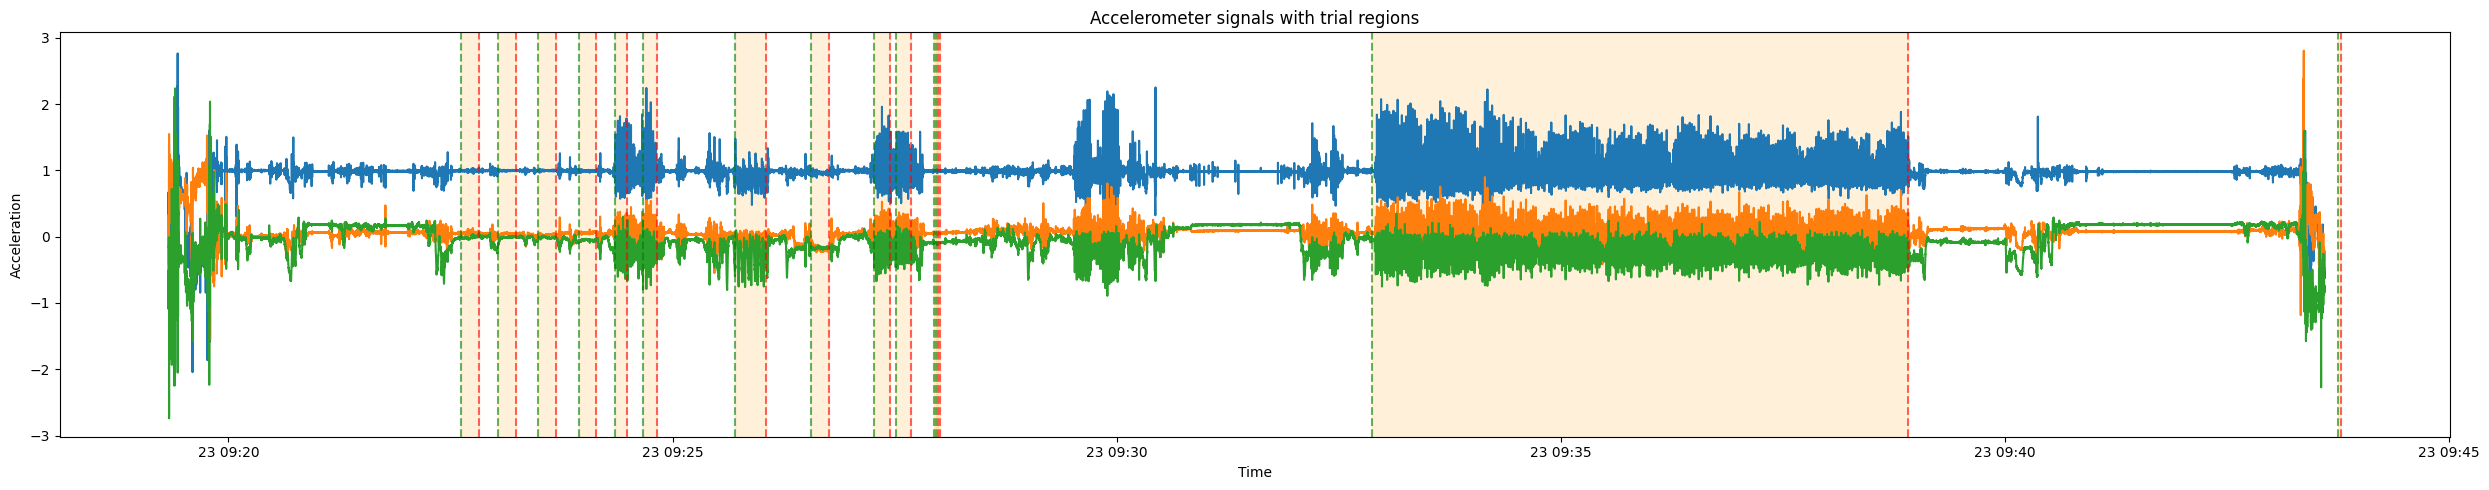


Processing subject 25049, session T3...

Processing subject 25050, session T1...

Processing subject 25050, session T3...

Processing subject 25050, session T5...

Processing subject 25051, session T1...

Processing subject 25051, session T2...

Processing subject 25051, session T3...

Processing subject 25051, session T4...

Processing subject 25051, session T5...

Processing subject 25052, session T1...

Processing subject 25052, session T2...

Processing subject 25052, session T3...

Processing subject 25052, session T4...

Processing subject 25052, session T5...

Processing subject 25053, session T1...

Processing subject 25053, session T2...

Processing subject 25054, session T1...

Processing subject 25054, session T2...

Processing subject 25054, session T3...

Processing subject 25054, session T4...

Processing subject 25054, session T5...

Processing subject 25055, session T1...

Processing subject 25055, session T2...

Processing subject 25056, session T1...

Processing subj

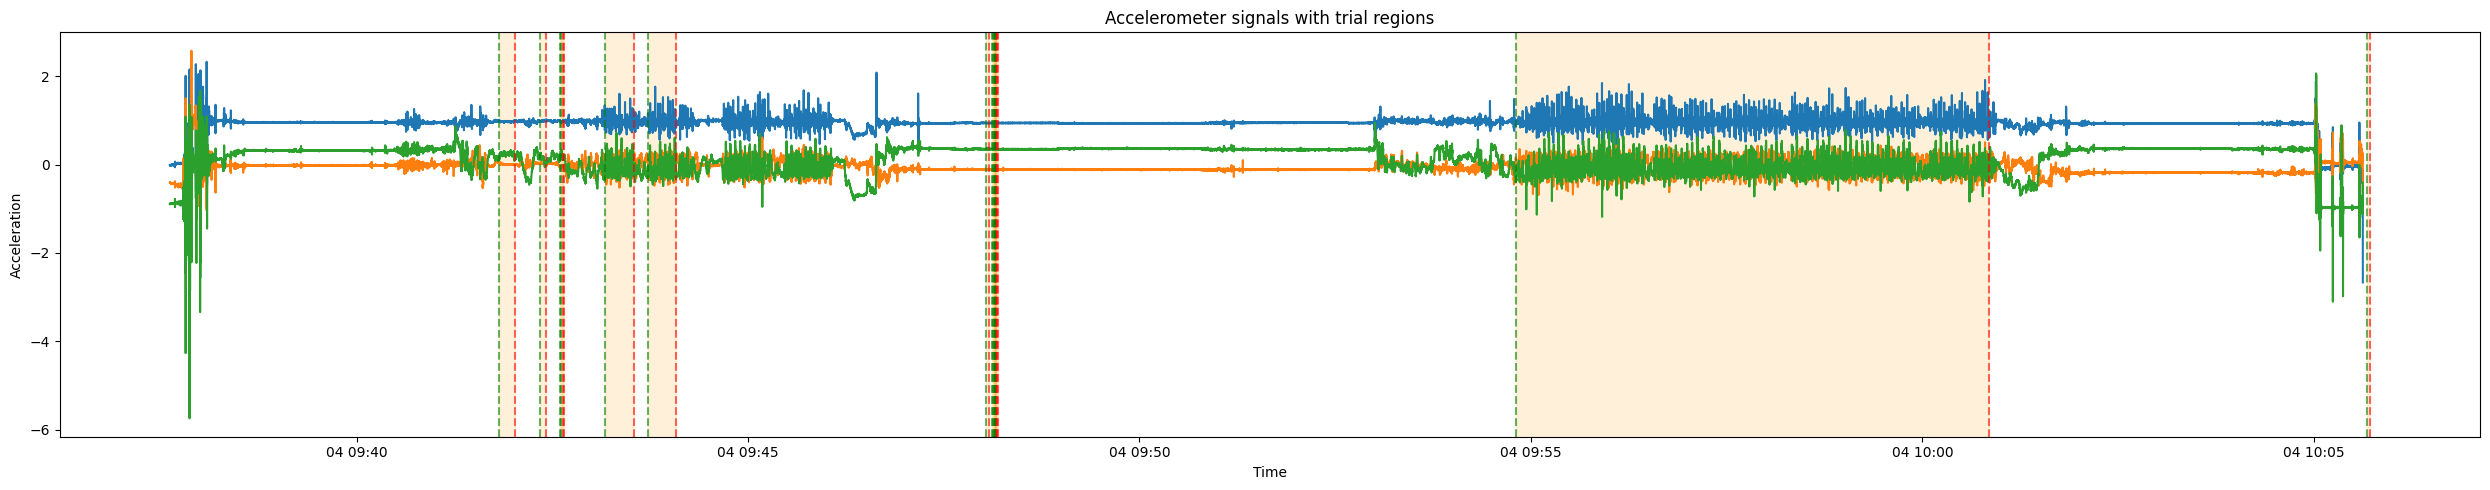


Processing subject 25057, session T2...

Processing subject 25057, session T3...

Processing subject 25057, session T4...

Processing subject 25057, session T5...

Processing subject 25058, session T1...

Processing subject 25058, session T2...

Processing subject 25058, session T3...

Processing subject 25058, session T4...

Processing subject 25058, session T5...

Processing subject 25059, session T1...


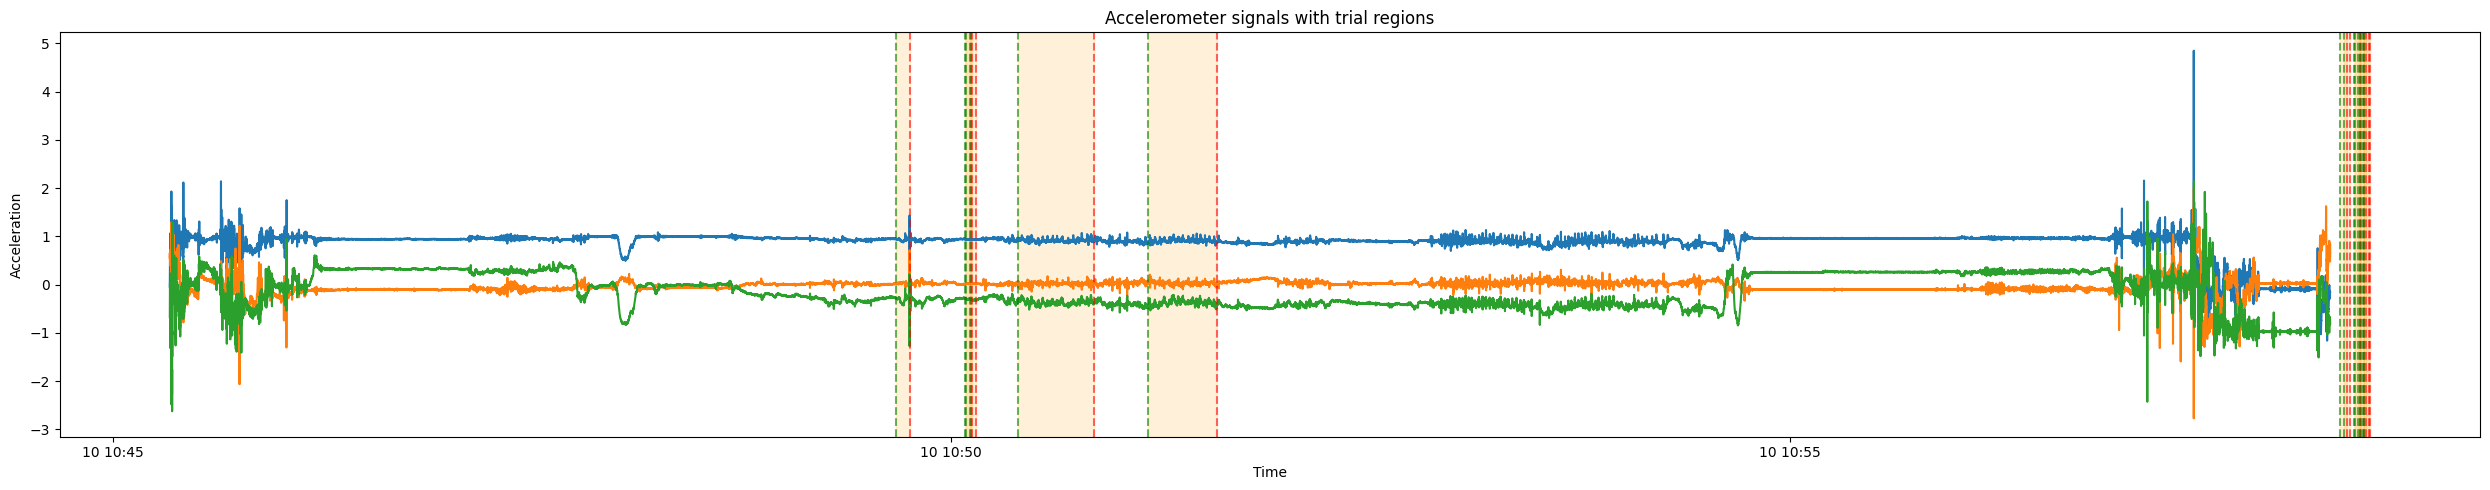

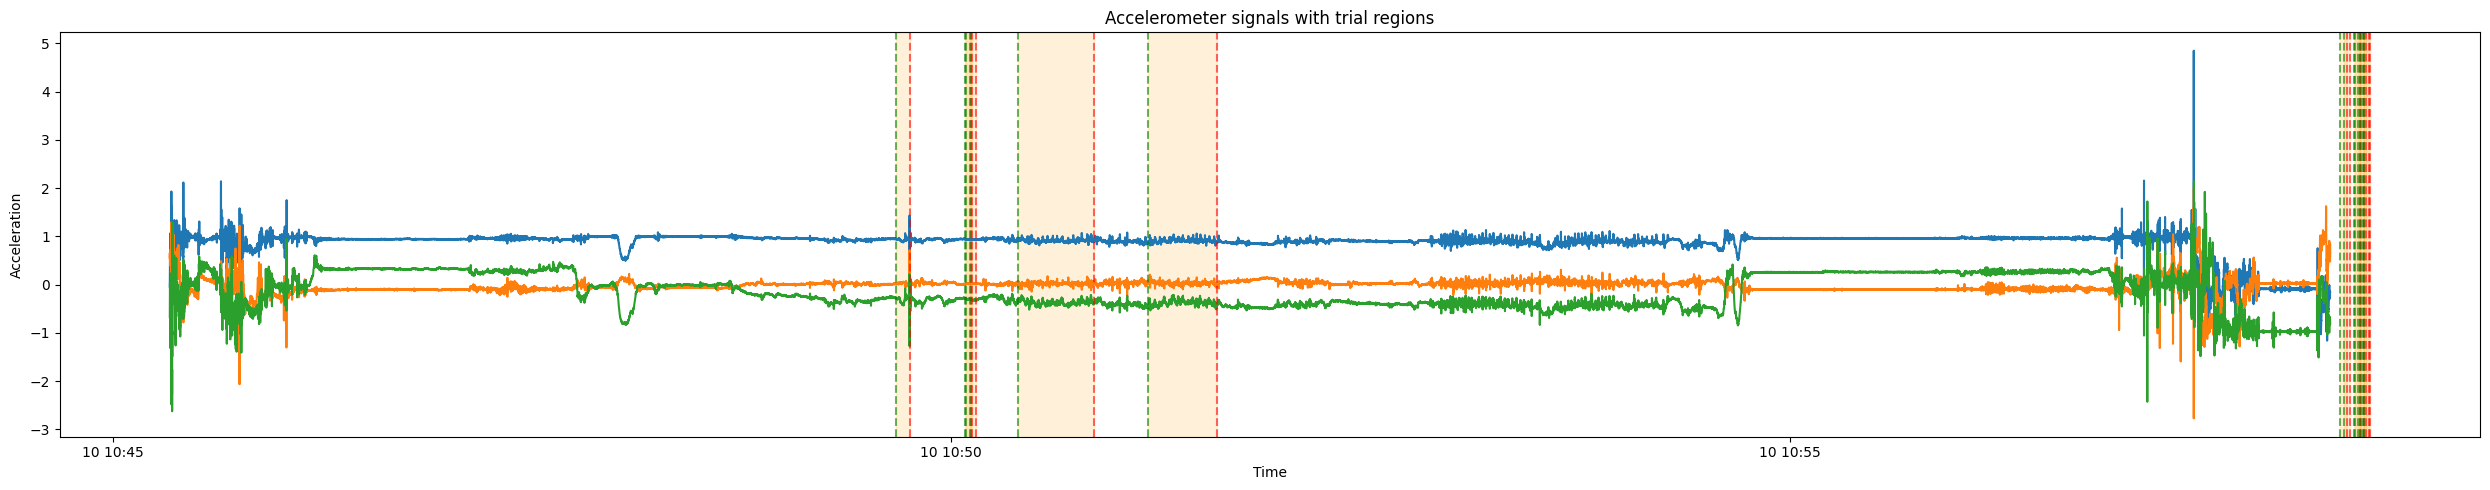

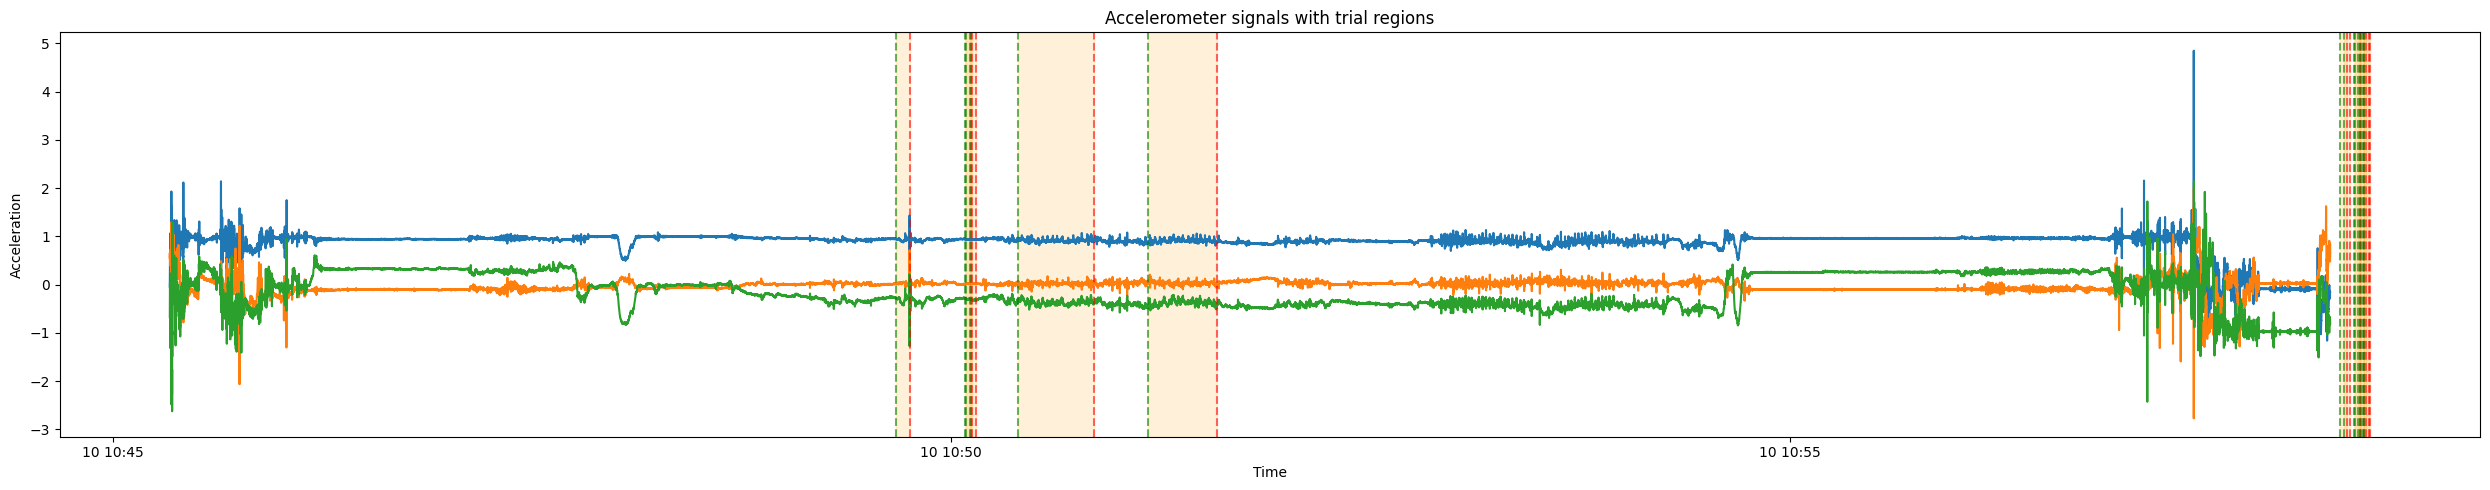

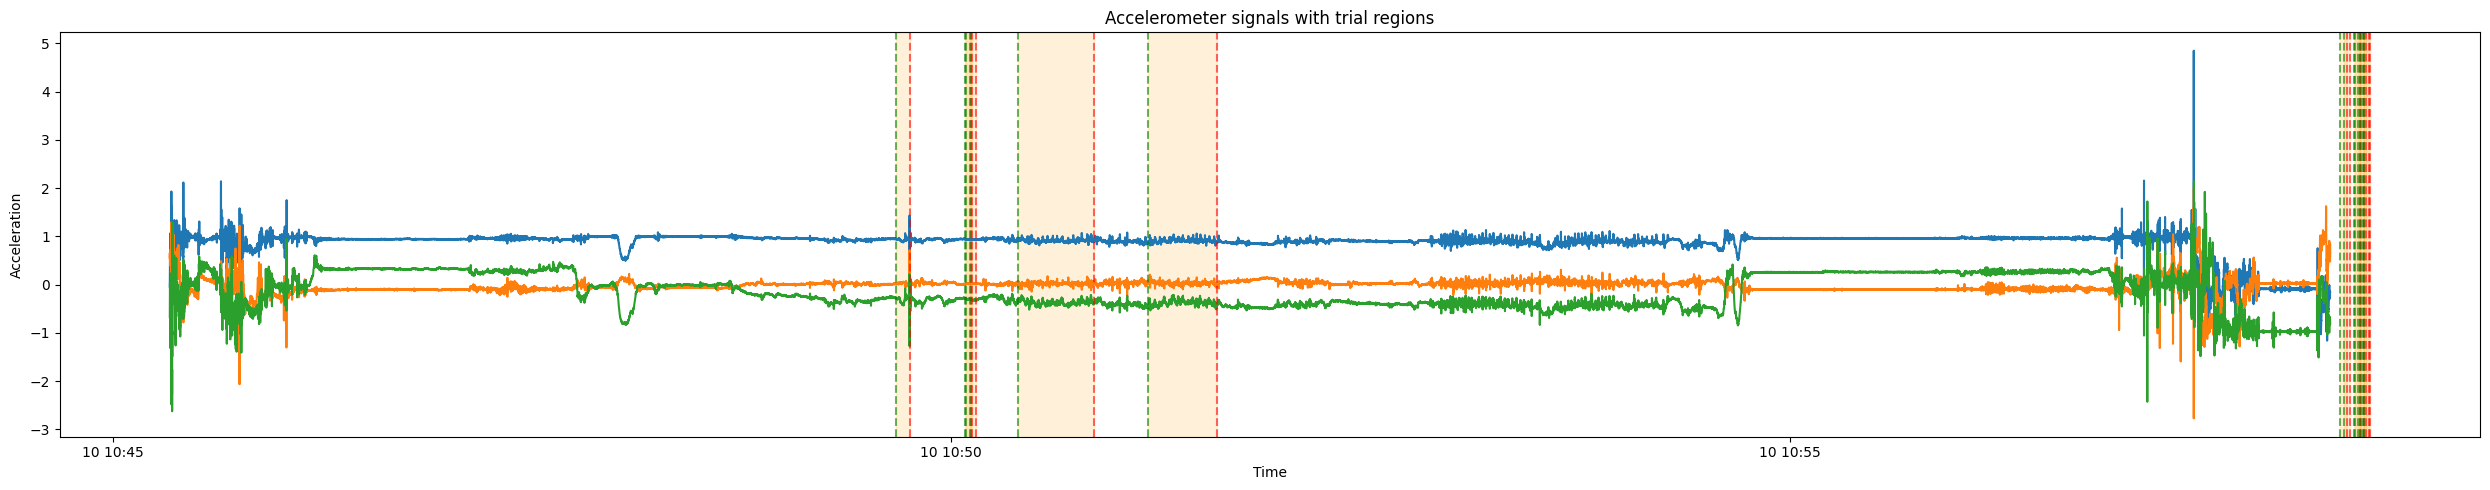

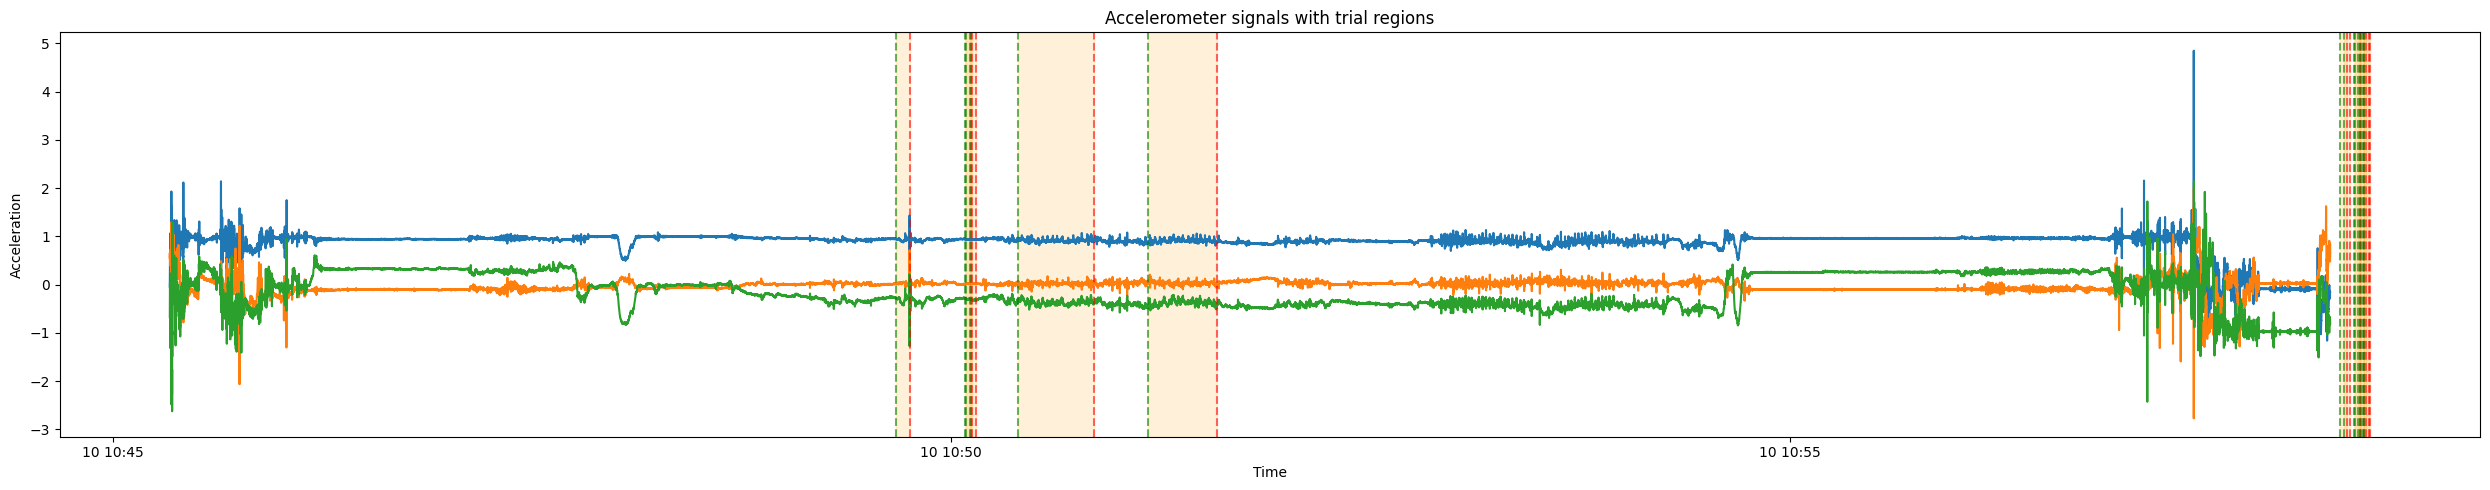

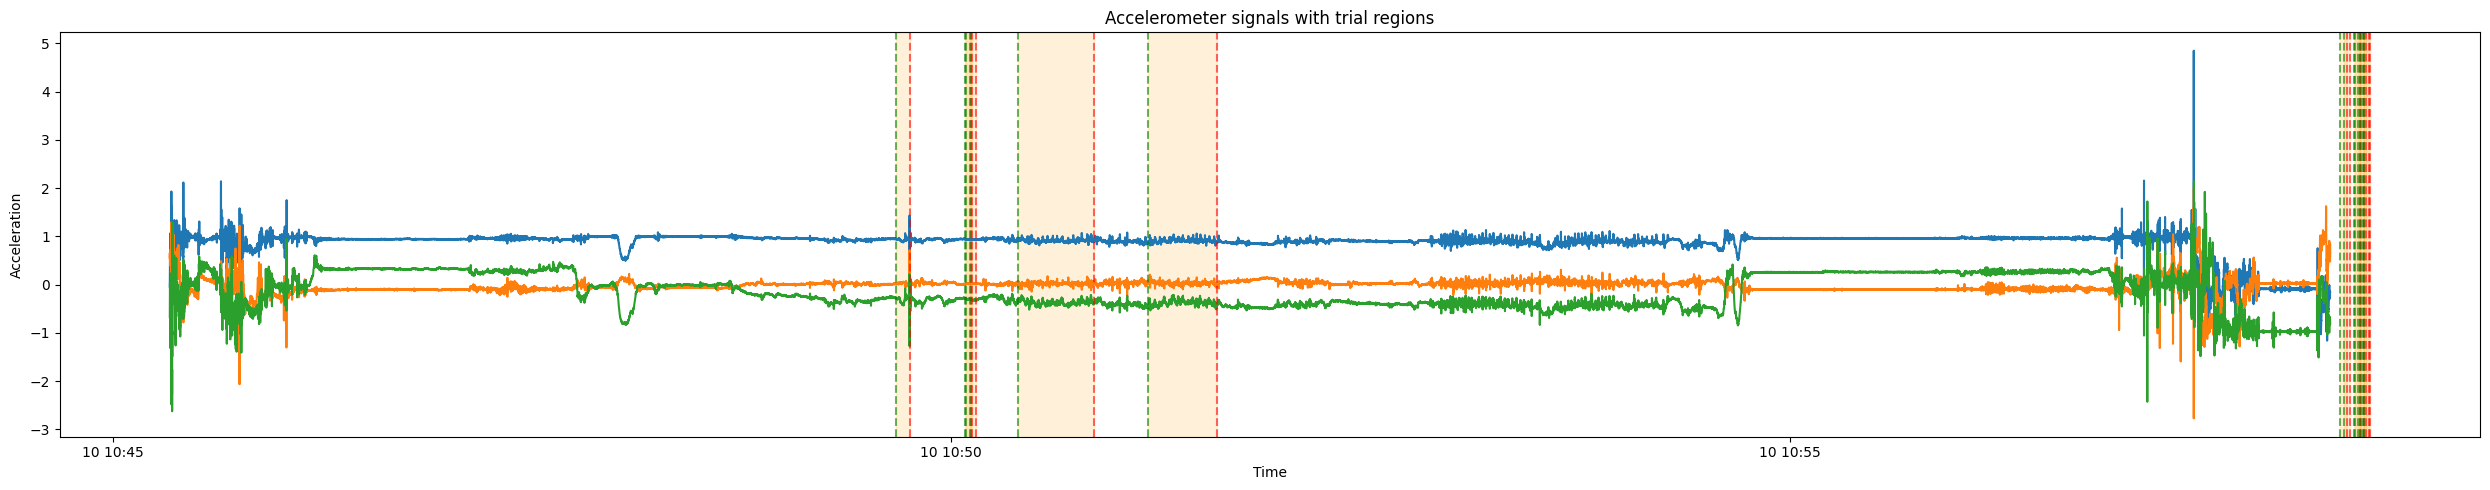


Processing subject 25059, session T2...

Processing subject 25060, session T1...

Processing subject 25060, session T2...

Processing subject 25060, session T3...

Processing subject 25060, session T4...

Processing subject 25060, session T5...

Processing subject 25061, session T1...

Processing subject 25061, session T2...

Processing subject 25061, session T3...

Processing subject 25061, session T5...

Processing subject 25062, session T1...

Processing subject 25062, session T2...

Processing subject 25063, session T1...

Processing subject 25063, session T2...

Processing subject 25063, session T3...

Processing subject 25063, session T4...

Processing subject 25063, session T5...

Processing subject 25064, session T1...

Processing subject 25064, session T2...

Processing subject 25064, session T3...

Processing subject 25064, session T4...

Processing subject 25065, session T1...

Processing subject 25065, session T2...

Processing subject 25065, session T3...

Processing subj

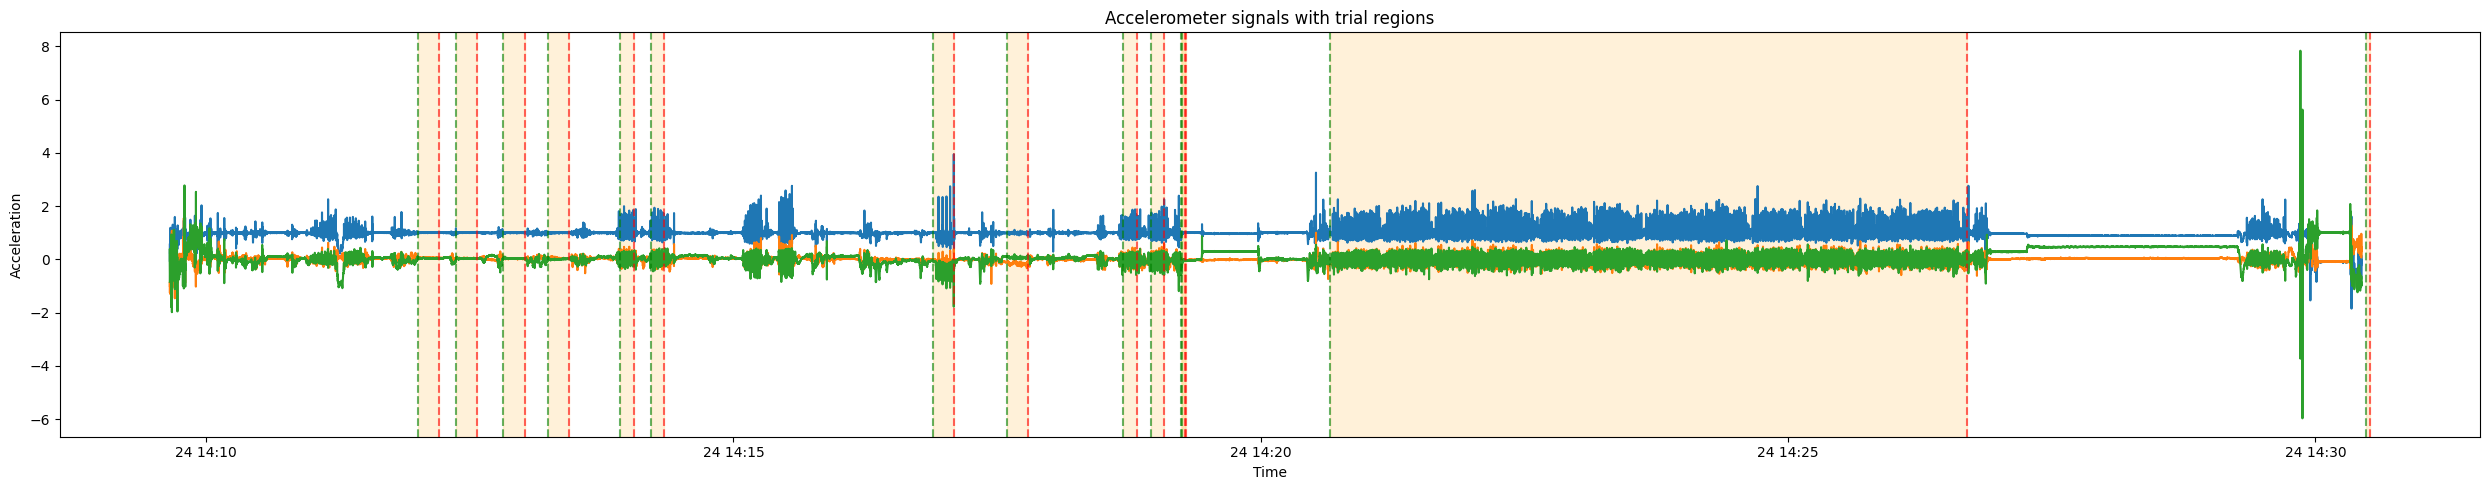


Processing subject 25078, session T2...

Processing subject 25078, session T3...

Processing subject 25078, session T4...

Processing subject 25078, session T5...

Processing subject 25079, session T1...

Processing subject 25080, session T1...

Processing subject 25081, session T1...

Processing subject 25081, session T2...

Processing subject 25081, session T3...

Processing subject 25081, session T5...

Processing subject 25082, session T2...

Processing subject 25082, session T3...

Processing subject 25082, session T4...

Processing subject 25083, session T1...


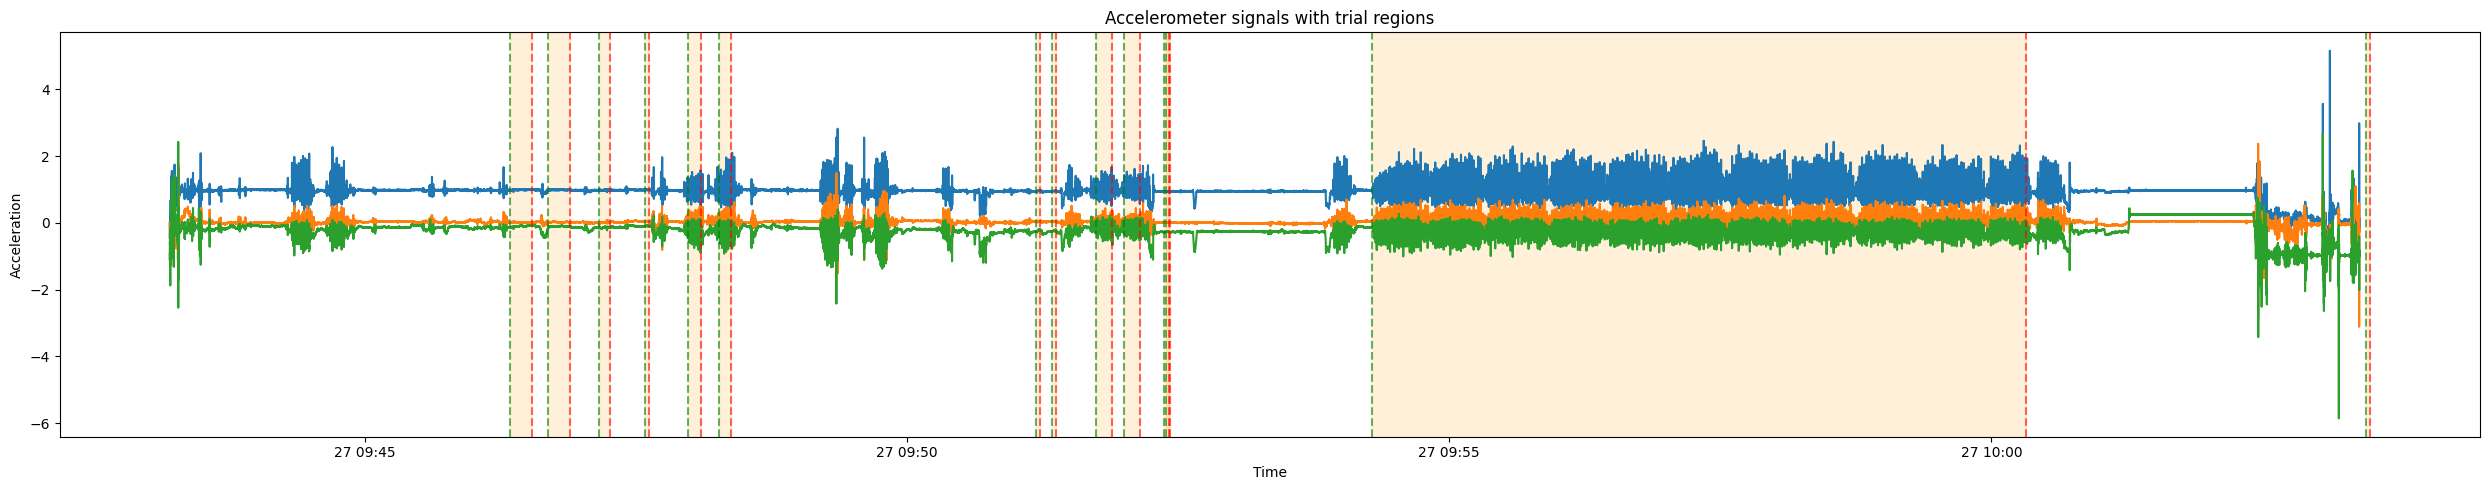


Processing subject 25083, session T2...

Processing subject 25083, session T3...

Processing subject 25083, session T5...

Processing subject 25084, session T1...

Processing subject 25084, session T2...

Processing subject 25084, session T3...

Processing subject 25084, session T4...

Processing subject 25084, session T5...

Processing subject 25085, session T1...

Processing subject 25085, session T2...

Processing subject 25085, session T3...

Processing subject 25085, session T4...

Processing subject 25085, session T5...

Processing subject 25086, session T1...

Processing subject 25086, session T2...

Processing subject 25086, session T3...

Processing subject 25086, session T5...

Processing subject 25087, session T1...

Processing subject 25087, session T2...

Processing subject 25087, session T4...

Processing subject 25087, session T5...

Processing subject 25088, session T1...

Processing subject 25088, session T2...

Processing subject 25088, session T3...

Processing subj

In [8]:
def find_files_with_progress(root_dir, sensor_type):
    root_dir = Path(root_dir)
    pattern = f"*T[1-5]-{sensor_type}*"
    cmd = [
        "powershell",
        "-Command",
        f"Get-ChildItem -Path '{root_dir}' -Recurse -File -Include '{pattern}' | ForEach-Object {{ $_.FullName }}"
    ]

    files = []
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL, text=True, bufsize=1)

    pbar = tqdm(desc=f"Scanning {root_dir}", unit="files", dynamic_ncols=True)
    try:
        for line in process.stdout:
            line = line.strip()
            if line:
                files.append(Path(line))
                pbar.update(1)
    finally:
        process.stdout.close()
        process.wait()
        pbar.close()

    print(f"✅ Found {len(files)} matching files.")
    return files

def get_window(start_time, end_time, acc_gyr):
    # Find indices efficiently using pandas' built-in searchsorted
    start_idx = acc_gyr["time"].searchsorted(start_time)
    end_idx = acc_gyr["time"].searchsorted(end_time)

    this_trial_acc_gyr = acc_gyr.iloc[start_idx:end_idx]
    return this_trial_acc_gyr

def plot_acc_gyr_markers(acc_gyr, markers, offset_seconds):
    acc_times = acc_gyr["time"].values
    plt.figure(figsize=(25, 5))
    plt.plot(acc_gyr["time"], acc_gyr[["acc_CC", "acc_ML", "acc_AP"]])
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.title("Accelerometer signals with trial regions")

    for i, marker in enumerate(markers):
        name = marker.get("trial", f"Unnamed_{i+1}")
        # Compute start/end times (same as in your loop)
        start_time = (acc_times[0] + pd.to_timedelta(marker["xaxis"]["from"] - offset_seconds, unit='s')).to_datetime64()
        end_time = (acc_times[0] + pd.to_timedelta(marker["xaxis"]["to"] + offset_seconds, unit='s')).to_datetime64()
        
        # Plot vertical lines or shaded span
        plt.axvline(start_time, color='green', linestyle='--', alpha=0.6)
        plt.axvline(end_time, color='red', linestyle='--', alpha=0.6)
        
        # Optional: shaded region (transparent)
        plt.axvspan(start_time, end_time, color='orange', alpha=0.15)
    
    plt.tight_layout()
    plt.show()

def read_gz_file(path):
    df_data = pd.read_csv(path, compression='gzip')
    if 'time' not in df_data.columns:
        raise ValueError(f"'time' column not found in file: {path}")

    # Convert numeric seconds to datetime
    df_data['time'] = pd.to_datetime(df_data['time'].astype(float), unit='s')
    return df_data

def save_to_mat(subject, timestamp, sensor_type, acc_gyr, markers, path_to_data, path_to_metadata, regenerate=False, prints = False):
    if prints:
        print(f"Processing {path_to_data}...")

    # set up paths for deletion and creation
    timestamp_path = os.path.join(path_to_data, timestamp)
    lab_path = os.path.join(timestamp_path, "Lab")

    if os.path.isfile(os.path.join(lab_path, "data.mat")) and os.path.isfile(os.path.join(lab_path, "infoForAlgo.mat")) and not regenerate:
        print("Data already generated. Skipping...")
        return
    elif os.path.isfile(os.path.join(lab_path, "data.mat")) and regenerate:
        os.remove(os.path.join(lab_path, "data.mat"))
    elif os.path.isfile(os.path.join(lab_path, "infoForAlgo.mat")) and regenerate:
        os.remove(os.path.join(lab_path, "infoForAlgo.mat"))
    
    # files to skip over contain these
    excluded_files = ["Balance", "STS"]
    
    if not markers:
        if prints:
            print("⚠️  No markers found — skipping trial extraction.")
        return

    if acc_gyr.shape[0] == 0:
        if prints:
            print("⚠️  No acc_gyr data found — skipping trial extraction.")
        return
    
    # get sample rate
    time_seconds = acc_gyr["time"].view('int64') / 1e9
    duration = time_seconds.iloc[-1] - time_seconds.iloc[0]
    if duration <= 0:
        raise ValueError("Invalid or zero-duration time range in acc_gyr.")
    fs = int(round(len(acc_gyr) / duration))

    # Load metadata
    subject_metadata = pd.read_csv(path_to_metadata, low_memory=False)
    subject_metadata["Local.Participant"] = subject_metadata["Local.Participant"].astype(str)
    subject_metadata["visit.number"] = subject_metadata["visit.number"].astype(str).str.lower()
    filled_metadata = pd.concat(
        [subject_metadata["Local.Participant"], 
         subject_metadata.groupby("Local.Participant", group_keys=False).ffill()],
        axis=1
    )
    filtered = filled_metadata[
        (filled_metadata["Local.Participant"] == str(subject)) &
        (filled_metadata["visit.number"] == timestamp.lower())
    ]
    
    if filtered.empty:
        raise ValueError(f"No metadata found for subject={subject}, visit={timestamp}")

    subject_metadata = filtered.iloc[0]

    # create infoForAlgo struct using metadata
    infoForAlgo = {
        "TimeMeasure1": {
            "Subject_ID": subject_metadata["Local.Participant"],
            "Cohort": subject_metadata["Cohort"],
            "Gender": subject_metadata["gender"],
            "Handedness": subject_metadata["domhand"],
            "Age": subject_metadata["age"],
            "Weight": subject_metadata["weight"],
            "Height": subject_metadata["height"],
            "SensorHeight": subject_metadata["senheight"],
            "SensorType_SU": sensor_type,
            "SensorAttachment_SU": "Body-Worn",
        }
    }

    acc_times = acc_gyr["time"].values  # daatetime64[ns]
    data = {"TimeMeasure1": {}}

    # the following is for debugging and was added when an issue with T1 being the only timepoint that works was noticed
    offset_seconds = 1
    search_range = 4 # number of hours to search for the right time over
    #plot_acc_gyr_markers(acc_gyr, markers, offset_seconds)
    
    # loop through marker files and get the appropriate regions for each trial.
    for i, marker in enumerate(markers):
        name = marker.get("trial", f"Unnamed_{i+1}")
        if not any(x in name for x in excluded_files):
            start_time = (acc_times[0] + pd.to_timedelta(marker["xaxis"]["from"] - offset_seconds, unit='s')).to_datetime64()
            end_time = (acc_times[0] + pd.to_timedelta(marker["xaxis"]["to"] + offset_seconds, unit='s')).to_datetime64()
            this_trial_acc_gyr = get_window(start_time, end_time, acc_gyr)
            
            # some markers are out by a different number of hours for some reason. 
            # We can catch these by checking if the trial data is empty and recursively adding 1h to the marker time if it is:
            if this_trial_acc_gyr.shape[0] == 0:
                for count in range(-search_range, search_range+1):
                    if prints:
                        print(f"⚠️  Data length for {name} is 0! Trying {count}hrs...")
                    new_start_time = start_time + np.timedelta64(count, 'h')
                    new_end_time = end_time + np.timedelta64(count, 'h')
                    this_trial_acc_gyr = get_window(new_start_time, new_end_time, acc_gyr)
                    if not this_trial_acc_gyr.shape[0] == 0:
                        if prints:
                            print(f"✅ Found data with offset of {count}hrs!")
                        break
                        
                # if we still have no data, it may be the trial that was out by the unix epoch so we need 
                # to add the unix time difference between now and the epoch and try again:
                if this_trial_acc_gyr.shape[0] == 0:
                    unix_epoch_diff = np.timedelta64(int(acc_times[0]))
                    if prints:
                        print(f"⚠️  Adding unix time since epoch...")
                    for count in range(-search_range, search_range+1):
                        if prints:
                            print(f"⚠️  Data length for {name} is still 0! Trying {count}hrs...")
                        new_start_time = start_time + np.timedelta64(count, 'h') + unix_epoch_diff
                        new_end_time = end_time + np.timedelta64(count, 'h') + unix_epoch_diff
                        this_trial_acc_gyr = get_window(new_start_time, new_end_time, acc_gyr)
                        if not this_trial_acc_gyr.shape[0] == 0:
                            if prints:
                                print(f"✅ Found data with offset of {count}hrs!")
                            break
    
                # if we still have no data, plot the data, tell us, and skip this timepoint
                # NOTE: should probably fix this to instead just pass on this marked activity
                if this_trial_acc_gyr.shape[0] == 0:
                    plot_acc_gyr_markers(acc_gyr, markers, offset_seconds)
                    if prints:
                        print(f"⚠️  {subject}, {timestamp}, {name} could not find data!")
                    continue

            if prints:
                print(f"{name} data shape = {this_trial_acc_gyr.shape}, NaNs (before interpolation) = {this_trial_acc_gyr.isna().sum().sum()}")

            # interpolate to remove NaNs
            this_trial_acc_gyr = this_trial_acc_gyr.interpolate(method='linear')
            
            # Convert timestamps to seconds for MATLAB
            reformatted_time = (this_trial_acc_gyr["time"].astype("int64") / 1e9).values.reshape(-1, 1)
    
            sensors = {
                "LowerBack": {
                    "Fs": {"Acc": fs, "Gyr": fs},
                    "Acc": this_trial_acc_gyr[["acc_CC", "acc_ML", "acc_AP"]].values,
                    "Gyr": this_trial_acc_gyr[["gyr_YAW", "gyr_PITCH", "gyr_ROLL"]].values,
                    "Timestamp": reformatted_time,
                }
            }
    
            name = ''.join(x for x in name.title() if not (x.isspace() or x=='-' or x=='(' or x==')')) # convert to pascal case
            if name[0].isdigit():
                name = "X" + name  # prepend a letter
            max_field_length_name = name[:30] # field names can only be 31 characters long
            if max_field_length_name in data["TimeMeasure1"]:
                # get number of trials in that test
                trial_num = f"Trial{str(len(data["TimeMeasure1"][max_field_length_name]) + 1)}"
                data["TimeMeasure1"][max_field_length_name][trial_num] = {
                    "SU": sensors,
                    "StartDateTime": pd.Timestamp(start_time),
                    "TimeZone": "Europe/UK",
                    "TrialName": name,
                }
            else:
                data["TimeMeasure1"][max_field_length_name] = {
                    "Trial1": {
                        "SU": sensors,
                        "StartDateTime": pd.Timestamp(start_time),
                        "TimeZone": "Europe/UK",
                        "TrialName": name,
                    }
                }

    os.makedirs(lab_path, exist_ok=True)

    savemat(os.path.join(lab_path, "data.mat"), {"data": data})
    savemat(os.path.join(lab_path, "infoForAlgo.mat"), {"infoForAlgo": infoForAlgo})

    if prints:
        print(f"✅ Saved MATLAB files to: {lab_path}")


#####################################################################################
##################################### MAIN ##########################################
#####################################################################################

root_dir = Path("X:/pervasive_group/Shared/MobilisedMS/Sensor data")
#root_dir = Path("C:/Users/ac4jmi/Desktop/MobilisedMS/Sensor Data")
path_to_metadata = Path("X:/pervasive_group/Shared/MobilisedMS/Main Datasets/V7.2/Main datasets for analysis T1-T5/.csv/MS_dataset_v.7.2.csv")

sensor_type = "MT"
files = find_files_with_progress(root_dir, sensor_type)

subjects = defaultdict(lambda: defaultdict(dict))
valid_types = {"acc", "gyr", "markers"}

pattern = re.compile(r'(?P<subject>\d+)-(?P<datatype>[a-z_]+)-(?P<timestamp>T[1-5])-MT-(?P<date>\d{8})')

for file in files:
    match = pattern.search(file.name)
    if match:
        subject = match.group("subject")
        datatype = match.group("datatype")
        timestamp = match.group("timestamp")
        if datatype in valid_types:
            subjects[subject][timestamp][datatype] = file


# --- Process each subject & session ---
for subject, sessions in subjects.items():
    for ts, data_dict in sessions.items():
        print(f"\nProcessing subject {subject}, session {ts}...")

        # Read accelerometer and gyroscope files
        dfs = {}
        for dtype in ["acc", "gyr"]:
            if dtype in data_dict:
                dfs[dtype] = read_gz_file(data_dict[dtype])
                # Prefix columns to identify source
                dfs[dtype].rename(columns={dtype + "_time": "time"}, inplace=True)

        # Skip if missing any required data
        if "acc" not in dfs or "gyr" not in dfs:
            print("Missing acc or gyr data, skipping...")
            continue

        # Merge acc + gyr data
        acc_gyr = pd.merge_asof(
            dfs["acc"].sort_values("time"),
            dfs["gyr"].sort_values("time"),
            on="time",
            tolerance=pd.Timedelta("10ms"),
            direction="nearest"
        )

        # Load markers if available
        markers = None
        if "markers" in data_dict:
            with open(data_dict["markers"], "r") as f:
                markers = json.load(f)

        path_to_data = os.path.dirname(data_dict["acc"])
        save_to_mat(subject, ts, sensor_type, acc_gyr, markers, path_to_data, path_to_metadata, regenerate = True, prints = False)

In [ ]:
# 1. calculate the dmos at each time point
# 2. calculate the differences in dmo between each time point (keep sign) (too much data?)
# 3. correlate differences in dmo with NEP score (mutual information gain?, PCA/LDA?)
# 4. check if real world or clinic-only is more significant

def get_paths_with_extension(extension, dataset_folder):
    paths = []

    for root, dirs, files in os.walk(dataset_folder):
        # Skip any folder path containing "\Lab\"
        if not "Lab" in root.split(os.sep):
            continue

        #if "MS24" in root.split(os.sep):
        #    continue
            
        for file in files:
            if file.lower().endswith(extension):
                path = os.path.join(root, file)
                paths.append(path)
    
    return paths

def get_mobilised_dataset(dataset_folder):

    print("Building dataset from .mat files...")
    paths_list = get_paths_with_extension("data.mat", dataset_folder)
    display(paths_list)
    # Build a dataset from the .mat files
    dataset = GenericMobilisedDataset(
        paths_list = paths_list,
        test_level_names = ["TimeMeasure", "Test", "Trial"], # This is the structure (without numbers) of the data inside the data.mat struct.
        measurement_condition = "laboratory", # I'm not currently sure what this does on the algorithm side of things, can also be "free_living".
        parent_folders_as_metadata=["study", "ignore", "subject_id", "timepoint", "location"] # these are the column headings for the metadata, the columns get populated with the folder names.
    )

    return dataset

# get mobgap dataset
dataset = get_mobilised_dataset(root_dir)
display(dataset)

df_all_stats = pd.DataFrame()
excluded_files = ["Balance", "STS"]

subjects = list({row[2] for row in dataset.group_labels})
subjects.sort()

for subject in subjects:
    subject_subset = dataset.get_subset(subject_id=str(subject))
    timepoints = list({row[3] for row in subject_subset.group_labels})
    timepoints.sort()
    for timepoint in timepoints:
        print(f"\nProcessing subject {subject}, timepoint {timepoint}...")
        # Start with subject/timepoint metadata
        df_current_timepoint_stats = pd.DataFrame({
            "subject_id": [subject],
            "timepoint": [timepoint]
        })

        timepoint_subset = subject_subset.get_subset(timepoint=timepoint)
        tests = list({row[6] for row in timepoint_subset.group_labels})
        tests.sort()
        
        for test in tests:
            # skip balance tests
            if not any(x in test for x in excluded_files):
                test_subset = timepoint_subset.get_subset(Test=test)
                trials = list({row[7] for row in test_subset.group_labels})
                trials.sort()
                
                for trial in trials:
                    print(f"  Running mobgap on {subject}, {timepoint}, {test}, {trial}...")
                    datapoint = test_subset.get_subset(Trial=trial)
                    
                    try:
                        datapoint._get_cohort = lambda *args, **kwargs: "MS"
                        pipeline = MobilisedPipelineImpaired()
                        pipeline = pipeline.safe_run(datapoint)
                        df_params = pipeline.aggregated_parameters_
                        
                        # Check if the pipeline actually returned anything
                        if df_params is not None and not df_params.empty:
                            df_params = df_params.add_prefix(f"{test}_{trial}_")
                            # Ensure index aligns for horizontal concat
                            df_params.index = [0]
                            df_current_timepoint_stats = pd.concat([df_current_timepoint_stats, df_params], axis=1)
                        else:
                            print(f"⚠️ No aggregated parameters for {subject}, {timepoint}, {test}, {trial}")
    
                    except ValueError as e:
                        if "interpolation range's minimum value" in str(e):
                            print("⚠️ Skipping datapoint — interpolation issue.")
                            pipeline = None
                        else:
                            raise

        # Append completed timepoint row to master table
        df_all_stats = pd.concat([df_all_stats, df_current_timepoint_stats], ignore_index=True)

display(df_all_stats)

df_all_stats.to_csv("C:/Users/ac4jmi/Desktop/MobilisedMS/df_all_stats.csv", index = False)

Building dataset from .mat files...


['X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25000\\T2\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25000\\T3\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25000\\T4\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25000\\T5\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25001\\T1\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25001\\T2\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25001\\T3\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25001\\T4\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25001\\T5\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\\MobilisedMS\\Sensor data\\MS25\\files\\25002\\T1\\Lab\\data.mat',
 'X:\\pervasive_group\\Shared\

,study,ignore,subject_id,timepoint,location,TimeMeasure,Test,Trial
0,MS25,files,25000,T2,Lab,TimeMeasure1,X4MwtSppb,Trial1
1,MS25,files,25000,T2,Lab,TimeMeasure1,X4MwtSppb,Trial2
2,MS25,files,25000,T2,Lab,TimeMeasure1,X4MwtWithoutAidIfApplicable,Trial1
3,MS25,files,25000,T2,Lab,TimeMeasure1,X4MwtWithoutAidIfApplicable,Trial2
4,MS25,files,25000,T2,Lab,TimeMeasure1,Tug,Trial1
...,...,...,...,...,...,...,...,...
10468,MS24,files,24707,T4,Lab,TimeMeasure1,X6Minwt,Trial1
10469,MS24,files,24707,T5,Lab,TimeMeasure1,X4MwtSppb,Trial1
10470,MS24,files,24707,T5,Lab,TimeMeasure1,X4MwtSppb,Trial2
10471,MS24,files,24707,T5,Lab,TimeMeasure1,Tug,Trial1



Processing subject 10376, timepoint T1...
  Running mobgap on 10376, T1, X4MwtSppb, Trial1...
  Running mobgap on 10376, T1, X4MwtSppb, Trial2...
  Running mobgap on 10376, T1, X6Minwt, Trial1...

Processing subject 10376, timepoint T2...
  Running mobgap on 10376, T2, Tug, Trial1...
  Running mobgap on 10376, T2, Tug, Trial2...
  Running mobgap on 10376, T2, X4MwtSppb, Trial1...
  Running mobgap on 10376, T2, X4MwtSppb, Trial2...
  Running mobgap on 10376, T2, X4MwtWithoutAidIfApplicable, Trial1...
⚠️ No aggregated parameters for 10376, T2, X4MwtWithoutAidIfApplicable, Trial1
  Running mobgap on 10376, T2, X4MwtWithoutAidIfApplicable, Trial2...
⚠️ No aggregated parameters for 10376, T2, X4MwtWithoutAidIfApplicable, Trial2
  Running mobgap on 10376, T2, X6Minwt, Trial1...

Processing subject 10376, timepoint T3...
  Running mobgap on 10376, T3, Tug, Trial1...
  Running mobgap on 10376, T3, Tug, Trial2...
  Running mobgap on 10376, T3, X4MwtSppb, Trial1...
  Running mobgap on 10376, T3

In [ ]:
# import the stats file and merge with the NEP scores - 0 means progression
df_all_stats = pd.read_csv("C:/Users/ac4jmi/Desktop/MobilisedMS/df_all_stats.csv")
df_nep = pd.read_excel("X:/pervasive_group/Shared/MobilisedMS/Main Datasets/NEPparticipants.xlsx")
df = pd.merge(df_all_stats, df_nep, left_on='subject_id', right_on='participant_id', how = 'left')
df = df.dropna(axis=1, how='all').drop(["Unnamed: 12", "participant_id", "used"], axis=1) # get rid of irrelevant columns

df_metadata = pd.read_csv(path_to_metadata, low_memory=False)
cols = [
    "wb_all_sum_w", "walkdur_all_sum_w", "steps_all_sum_w", "turns_all_sum_w",
    "wbdur_all_avg_w", "wbdur_all_max_w", "wbdur_all_var_w",
    "cadence_all_avg_w", "strdur_all_avg_w", "cadence_all_var_w",
    "strdur_all_var_w", "ws_1030_avg_w", "strlen_1030_avg_w",
    "wb_10_sum_w", "ws_10_max_w", "wb_30_sum_w", "ws_30_avg_w",
    "strlen_30_avg_w", "cadence_30_avg_w", "strdur_30_avg_w",
    "ws_30_max_w", "cadence_30_max_w", "ws_30_var_w", "strlen_30_var_w",
    "wb_60_sum_w", "Local.Participant", "visit.number"
]
df_metadata = df_metadata[cols].rename(columns = {"Local.Participant": "subject_id", "visit.number": "timepoint"})
df_metadata["timepoint"] = df_metadata["timepoint"].str.upper()

df = df.rename(columns = lambda x: f"in_clinic_{x}" if not x in {"subject_id", "timepoint", "EDSS", "T25FW", "NHPT", "SMWT", "TUG", "SDMT", "MSWS", "NEPplus", "NEP"} else x)
df_metadata = df_metadata.rename(columns = lambda x: f"free_living_{x}" if not x in {"subject_id", "timepoint"} else x)

df_all_data = pd.merge(
    left=df, 
    right=df_metadata,
    how='left',
    left_on=['subject_id', 'timepoint'],
    right_on=['subject_id', 'timepoint'],
).reset_index(drop=True)

df_all_data = df_all_data.dropna(axis=1, how='all')

# create another dataframe which is a flattened version such that only 1 row exists per subject
df_flattened = df_all_stats.copy()

df_flattened = (
    df_flattened
    .set_index(['subject_id', 'timepoint'])     # use subject_id + timepoint as multi-index
    .unstack('timepoint')                       # pivot timepoint values into columns
)

df_flattened.columns = [f"{col[0]}_{col[1]}" for col in df_flattened.columns]
df_flattened = df_flattened.reset_index()

df_flattened = pd.merge(df_flattened, df_nep, left_on='subject_id', right_on='participant_id', how = 'left').dropna(axis=1, how='all').drop(["participant_id", "Unnamed: 12", "used"], axis=1)

display(df_all_data)
display(df_flattened)

In [ ]:
# Good resources for GEE:
# https://www.youtube.com/watch?v=diXAmukwY2w

import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.cov_struct import Exchangeable

predictors = [col for col in df_all_data.columns if 'in_clinic' in col] # X6Min
predictors.extend([col for col in df_all_data.columns if 'free_living' in col])

print(df_all_data.isna().any(axis=1))

display(predictors)

formula = "NEP ~ " + " + ".join(predictors) + " + timepoint"

# Fit GEE logistic regression with exchangeable correlation structure
gee_model = GEE.from_formula(
    formula,
    groups="subject_id",
    data=df_all_data,
    family=Binomial(),
    cov_struct=Exchangeable()
)
gee_result = gee_model.fit()

print(gee_result.summary())


In [ ]:
# now we have a dataframe of patients with multiple timepoints and whether they experienced any progression over the course of the study.
# NEP is defined as having a sustained meaningful change confirmed at 12 months
def point_biserial_correlation(df):
    if "timepoint" in df:
        df_for_correlation = pd.DataFrame()
        subject_ids = df["subject_id"].unique()
        for subject in subject_ids:
            cur_sub = df[df["subject_id"] == subject].reset_index(drop=True)
                
            wanted_cols = [col for col in df.columns if 'in_clinic' in col] # X6Min
            wanted_cols.extend([col for col in df.columns if 'free_living' in col])
            std = pd.DataFrame(cur_sub[wanted_cols].std(axis = 'rows')).transpose().add_prefix("std_")
            mean = pd.DataFrame(cur_sub[wanted_cols].mean(axis = 'rows')).transpose().add_prefix("mean_")
            stats = pd.concat([std, mean], axis = 1)
        
            diff = (cur_sub[wanted_cols].iloc[-1] - cur_sub[wanted_cols].iloc[0]).to_frame().T.add_prefix("diff_")
            stats = pd.concat([stats, diff], axis = 1)
            
            stats["subject_id"] = subject
            stats["NEP"] = cur_sub["NEP"].mean()
            df_for_correlation = pd.concat([df_for_correlation, stats]).reset_index(drop=True)
        
        df_for_correlation = df_for_correlation.dropna(axis=1, how='all')
    else:
        df_for_correlation = df
    corr_columns = columns = ["variable_name", "correlation_value", "p_value"]
    correlation_results = pd.DataFrame()
    for col in df_for_correlation.columns:
        if col == "NEP": 
            continue
    
        temp_df_for_correlation = df_for_correlation.dropna(subset=["NEP", col])
    
        if len(temp_df_for_correlation) > 2 and temp_df_for_correlation[col].nunique() > 1:
            corr, p_val = pointbiserialr(
                temp_df_for_correlation["NEP"],
                temp_df_for_correlation[col]
            )
    
            temp_correlation_results = pd.DataFrame(
                [[col, corr, p_val]],
                columns=corr_columns
            )
            correlation_results = pd.concat(
                [correlation_results, temp_correlation_results],
                ignore_index=True
            )
    return correlation_results

correlation_results = point_biserial_correlation(df_all_data)
print(correlation_results[correlation_results["p_value"] <= 0.05].sort_values(by=["correlation_value"], ascending=False))

correlation_results = point_biserial_correlation(df_flattened)
print(correlation_results[correlation_results["p_value"] <= 0.05].sort_values(by=["correlation_value"], ascending=False))
